## WINE CLASSIFICATION USING PCA AND KNN

In [15]:
import pandas as pd
df=pd.read_csv('./wine.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
#So okay we first have to see the data
df.shape
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [17]:
# SO missing value are quite small so we can just drop them
df.dropna(inplace=True)
# df.isnull().sum()

In [36]:
#so we have to do two things-
# encode white and red wine as we only have two 
# and standarized the data

# TASK 1 - Type mapping 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['type'].unique()
# TASK 2 - Standard Scalling the data set
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df.iloc[:,1:]=sc.fit_transform(df.iloc[:,1:])

### FIRST RUN WITHOUT PCA using all the feature

In [19]:
# so we have 13 features we will use them all
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('type',axis=1),df['type'],test_size=0.33,random_state=42)
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train,y_train)
# let's split the data


KNeighborsClassifier()

In [132]:
X_train.head()
y_train.head()
# kn.transform(X_test)

1724    1
5202    0
6273    0
90      1
2297    1
Name: type, dtype: int64

In [21]:
# now get the accuracy
# y_pred=kn.predict(X_test)
# acuracy=kn.score(X_test,y_test)
# print('The accuracy is: ',acuracy)
# let's use cross validation score for it
from sklearn.model_selection import cross_val_score
print('accuracy using cross validation: ',cross_val_score(kn,X,y,cv=10).mean())

accuracy using cross validation:  0.99226389001871


#### Now let's use PCA

In [46]:
from sklearn.decomposition import PCA
X=df.drop('type',axis=1)
y=df['type']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
# first using just 5 dimenstion 
pc=PCA(n_components=6)
X_train_tf=pc.fit_transform(X_train)
X_test_tf=pc.transform(X_test)
X_train_tf.shape
# pc

(4330, 6)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train_tf,y_train)
acuracy=kn.score(X_test_tf,y_test)
print(acuracy)
print(pc.explained_variance_ratio_)
# let's use cross validation score for it
steps=[('PCA',pc),
       ('knn',kn)]
pipe=Pipeline(steps)
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X,y,cv=10).mean()
pipe

0.9901547116736991
[0.25197649 0.21816606 0.13667124 0.09134655 0.07292959 0.05497517]


Pipeline(steps=[('PCA', PCA(n_components=6)), ('knn', KNeighborsClassifier())])

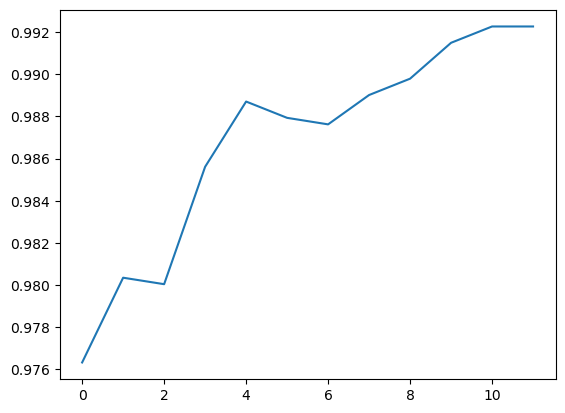

In [56]:
#plot of accuracy and number of component
import matplotlib.pyplot as plt
acc_list=[]
for i in range(1,13):
    pc=PCA(n_components=i)
    kn = KNeighborsClassifier(n_neighbors=5)
    steps=[('PCA',pc),
       ('knn',kn)]
    pipe=Pipeline(steps)
    acc_list.append(cross_val_score(pipe,X,y,cv=10).mean())
    # print(cross_val_score(pipe,X,y,cv=10).mean())

plt.plot(acc_list)
